# Problem 1A
Identify and rectify any missing values in the data using appropriate techniques

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("D:/MachineLearning/Assignment1/data/earth_surface_temperatures.csv")

In [4]:
df.head()

,Years,Month,Country,Temperature,Monthly_variation,Anomaly
0,1848,5,Afghanistan,19.573,-0.297,2.037
1,1848,6,Afghanistan,23.894,-0.796,2.136
2,1848,7,Afghanistan,26.507,-0.113,1.937
3,1848,8,Afghanistan,24.498,-0.462,1.937
4,1848,9,Afghanistan,19.068,-1.272,1.865


In [5]:
df.isnull().sum()

Years                    0
Month                    0
Country                  0
Temperature          25753
Monthly_variation    25753
Anomaly              25753
dtype: int64

<Axes: >

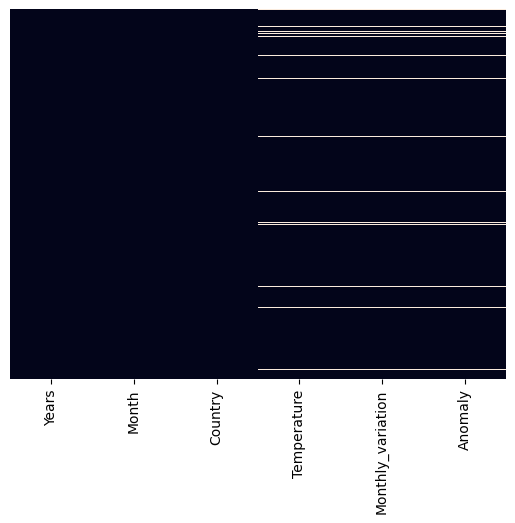

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Monthly_variation'] = df['Monthly_variation'].fillna(df['Monthly_variation'].mean())
df['Anomaly'] = df['Anomaly'].fillna(df['Anomaly'].mean())

<Axes: >

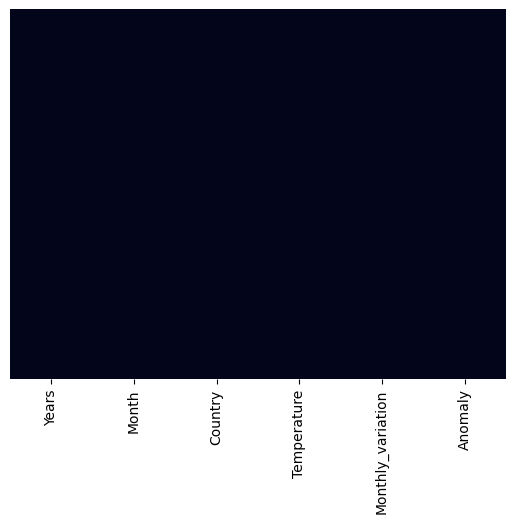

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# Problem 1B
Transform the Years and Month columns into a single column labeled "Date" in 
the MM-YYYY format, with a datetime64[ns] data type. 

In [10]:
df['Date'] = pd.to_datetime(df[['Month','Years']].assign(Day=1)).dt.strftime('%m-%Y')

In [11]:
df.head()

,Years,Month,Country,Temperature,Monthly_variation,Anomaly,Date
0,1848,5,Afghanistan,19.573,-0.297,2.037,05-1848
1,1848,6,Afghanistan,23.894,-0.796,2.136,06-1848
2,1848,7,Afghanistan,26.507,-0.113,1.937,07-1848
3,1848,8,Afghanistan,24.498,-0.462,1.937,08-1848
4,1848,9,Afghanistan,19.068,-1.272,1.865,09-1848


# Problem 1C
Detect and investigate extreme temperature values that might be regarded as 
outliers. 

<Axes: xlabel='Temperature'>

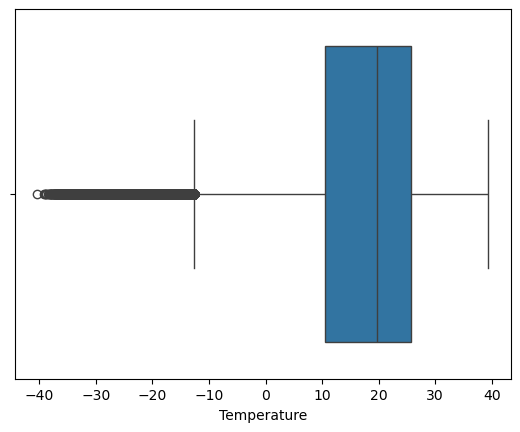

In [13]:
sns.boxplot(x=df['Temperature'])

In [14]:
q1 = df['Temperature'].quantile(0.25)
q3 = df['Temperature'].quantile(0.75)
IQR = q3-q1

threshold = 2
outliers = df[(df['Temperature']<q1-threshold*IQR) | (df['Temperature']>q3+threshold*IQR)]
outliers

,Years,Month,Country,Temperature,Monthly_variation,Anomaly,Date
17078,1956,3,Antarctica,-24.355,-0.025,1.423,03-1956
17079,1956,4,Antarctica,-28.810,-0.010,1.667,04-1956
17080,1956,5,Antarctica,-31.041,-0.351,1.056,05-1956
17081,1956,6,Antarctica,-31.425,0.335,1.000,06-1956
17082,1956,7,Antarctica,-32.441,0.519,1.178,07-1956
...,...,...,...,...,...,...,...
463657,1981,3,Svalbard and Jan Mayen,-21.039,-4.499,0.674,03-1981
463667,1982,1,Svalbard and Jan Mayen,-20.420,-4.330,0.785,01-1982
463716,1986,2,Svalbard and Jan Mayen,-20.550,-4.460,1.425,02-1986
463750,1988,12,Svalbard and Jan Mayen,-21.825,-8.165,1.052,12-1988


# Problem 1d
Compute summary statistics for temperature, monthly variation, and anomaly 
values, including mean, median, standard deviation, and range.

In [16]:
df[['Temperature','Monthly_variation','Anomaly']].describe()

,Temperature,Monthly_variation,Anomaly
count,534571.000000,534571.000000,534571.000000
mean,17.059014,-0.075495,0.888305
std,10.928609,1.201271,1.043615
min,-40.349000,-10.566000,0.037000
25%,10.433000,-0.625000,0.301000
50%,19.784000,-0.075495,0.525000
75%,25.774000,0.511000,0.960000
max,39.384000,11.817000,12.203000


# Problem 1e
Identify the countries included in the dataset and calculate their average 
temperature values.

In [18]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bonaire, Saint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burma',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Christmas Island', 'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Denmark (Europe)',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea',

In [19]:
df.groupby('Country')['Temperature'].mean()

Country
Afghanistan       14.476292
Albania           12.760633
Algeria           22.063457
American Samoa    25.880581
Andorra           11.142018
                    ...    
Virgin Islands    25.354143
Western Sahara    23.297923
Yemen             26.169337
Zambia            21.356084
Zimbabwe          21.185253
Name: Temperature, Length: 233, dtype: float64

# Problem 1f
Determine the overall trend in global temperatures over the years and visualize 
this trend using a suitable chart.

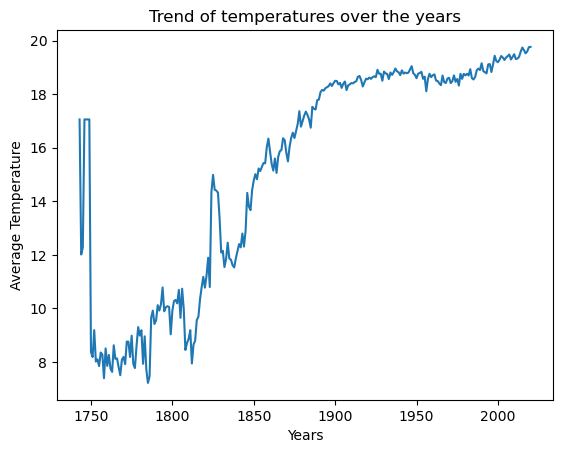

In [21]:
avg_temp = df.groupby('Years')['Temperature'].mean()
plt.title('Trend of temperatures over the years')
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.plot(avg_temp)

# Problem 1g
Identify the months with the highest and lowest temperatures for each country and find out whether there are noticeable seasonal patterns in the temperature data.

In [23]:
df.groupby(['Country','Month'])['Temperature'].agg(['min','max'])

min        max
Country     Month                      
Afghanistan 1      -4.588000  17.059014
            2      -3.363000  17.059014
            3       3.783000  17.059014
            4      11.174000  18.464000
            5      16.760000  24.264000
...                      ...        ...
Zimbabwe    8      15.354000  21.099000
            9      17.059014  24.458000
            10     21.800000  26.501000
            11     22.262000  26.732000
            12     21.687000  26.399000

[2796 rows x 2 columns]

Text(0.5, 1.0, 'Seasonal Temperature Patterns by Country')

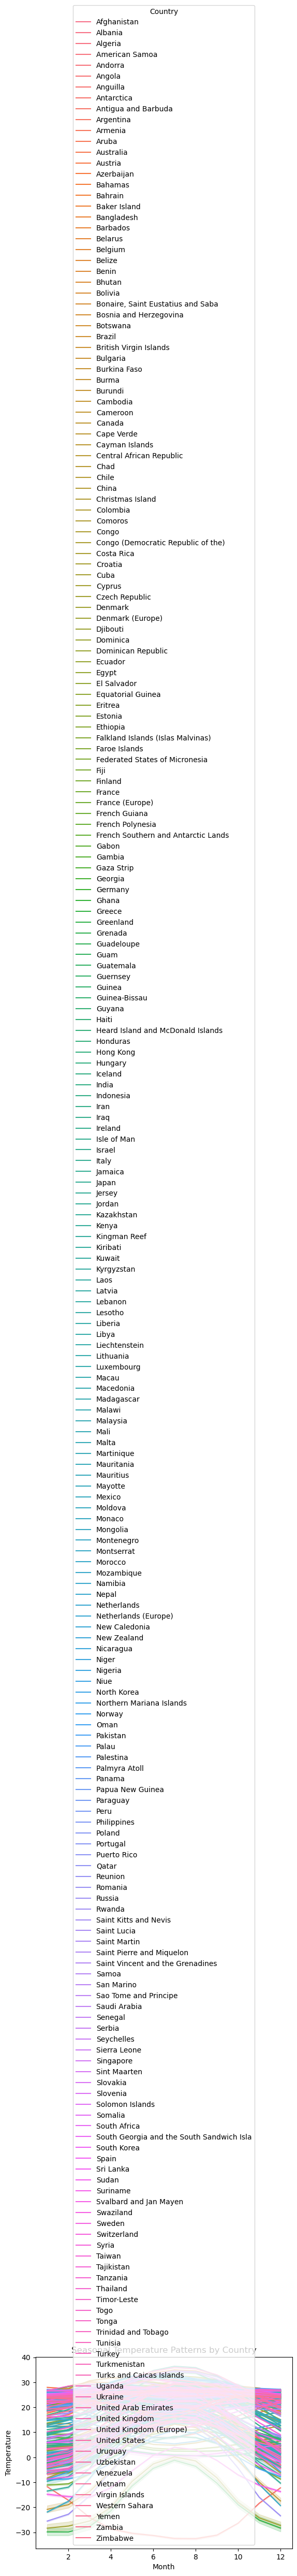

In [24]:
sns.lineplot(x='Month', y='Temperature',hue='Country', data=df)
plt.title('Seasonal Temperature Patterns by Country')

# Problem 1h
Explore the variation in temperature anomalies on a monthly basis and identify 
any months with consistently high or low anomalies across the years.

Text(0, 0.5, 'Average Anomaly')

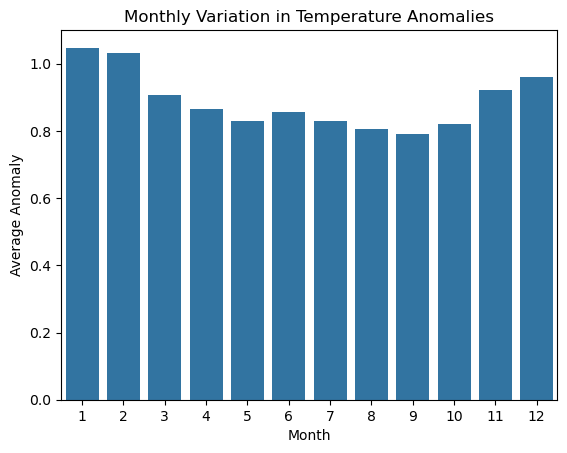

In [26]:
a = df.groupby('Month')['Anomaly'].mean()
sns.barplot(x=a.index,y=a.values)
plt.title('Monthly Variation in Temperature Anomalies')
plt.xlabel('Month')
plt.ylabel('Average Anomaly')

In [27]:
df.groupby(['Years','Month'])['Anomaly'].agg(['min','max'])

min       max
Years Month                    
1743  12     0.888305  0.888305
1744  1      0.888305  0.888305
      2      0.888305  0.888305
      3      0.888305  0.888305
      4      1.986000  2.653000
...               ...       ...
2020  8      0.092000  1.646000
      9      0.164000  1.184000
      10     0.127000  1.367000
      11     0.131000  1.606000
      12     0.178000  1.716000

[3325 rows x 2 columns]

# Problem 1i
Choose five countries and compare the trends in their temperatures over the 
years, seeking any similar temperature patterns.

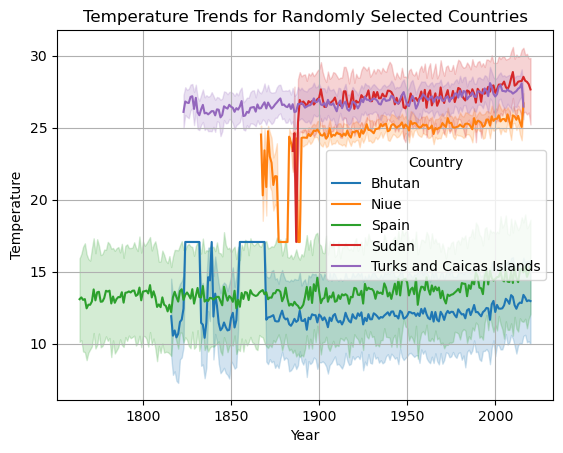

In [29]:
random_countries = np.random.choice(df['Country'].unique(), size=5, replace=False)
filter_df = df[df['Country'].isin(random_countries)]

sns.lineplot(x='Years',y='Temperature',hue='Country',data=filter_df)
plt.title('Temperature Trends for Randomly Selected Countries')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(title='Country')
plt.grid(True)

# Problem 1j
Explore the potential correlation between temperature and monthly variation or anomaly values. Calculate correlation coefficients and create scatterplots to investigate this relationship.

<Axes: xlabel='Temperature', ylabel='Anomaly'>

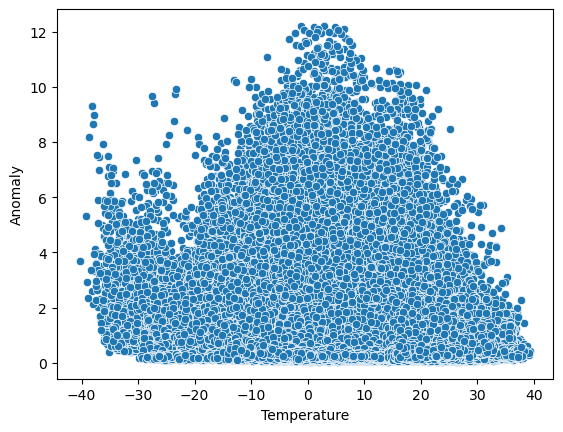

In [31]:
correlation_matrix = df[['Temperature','Monthly_variation','Anomaly']].corr()
correlation_matrix
sns.scatterplot(x='Temperature',y='Anomaly',data=df)

# Problem 1k
Provide an intriguing insight from the dataset by utilizing data visualization 
techniques such as histograms, box plots, or heatmaps to represent the data' 
distribution, trends, and relationships.

<Axes: >

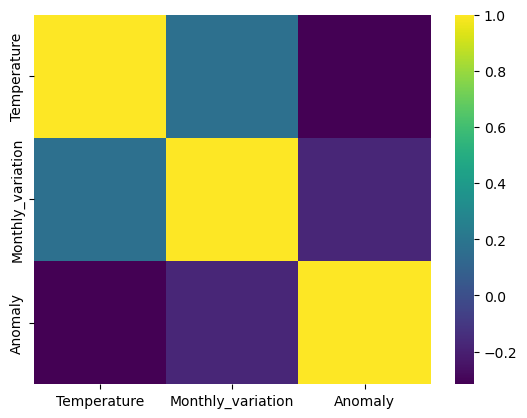

In [33]:
sns.heatmap(data=correlation_matrix,cmap='viridis')

Text(0.5, 1.0, 'Distribution of Temperature')

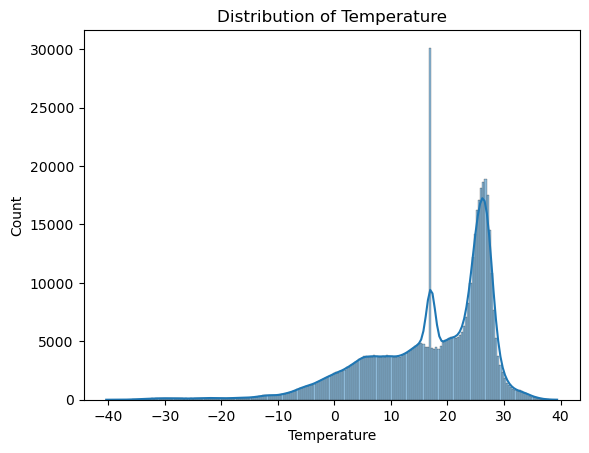

In [34]:
sns.histplot(x='Temperature',data=df,kde=True)
plt.title('Distribution of Temperature')

Text(0.5, 1.0, 'Boxplot of Temperature by Month')

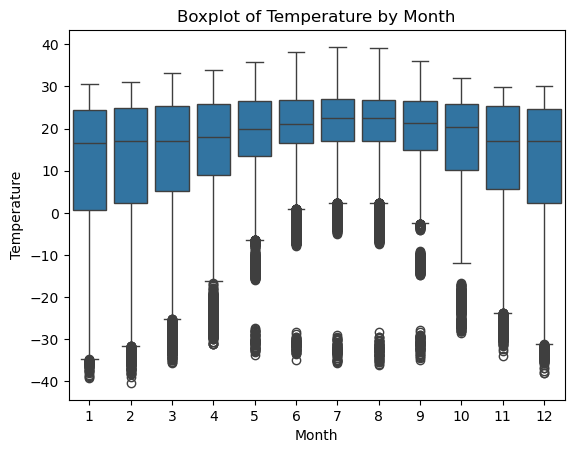

In [35]:
sns.boxplot(x='Month', y='Temperature', data=df)
plt.title('Boxplot of Temperature by Month')